# Predicting Student Depression Using Machine Learning
### Ivan Seredkin
### DTSA 5509
## Github: https://github.com/seiv40/Student-Depression/

## Introduction
This project is for my DTSA 5509 Introduction to Machine Learning course. Mental health issues among students have been increasingly recognized as a major concern. Academic stress, financial burdens, and personal challenges contribute to the risk of depression. This project aims to predict student depression based on various factors such as academic pressure, financial stress, sleep duration, and previous mental health history. By using machine learning techniques, I seek to develop a predictive model that can help identify students at higher risk, thereby facilitating early intervention.

## Objectives
- Perform exploratory data analysis (EDA) to understand patterns in student mental health data.
- Engineer relevant features that could impact depression prediction.
- Train multiple supervised learning models and compare their effectiveness.
- Optimize the model to reduce false negatives, ensuring we do not overlook students who may need help.
- Evaluate and interpret model results to derive actionable insights.

##  Load Dataset & Initial Exploration

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv('data/Student_Depression_Dataset.csv')

# Basic dataset information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

(None,
    id  Gender   Age           City Profession  Academic Pressure  \
 0   2    Male  33.0  Visakhapatnam    Student                5.0   
 1   8  Female  24.0      Bangalore    Student                2.0   
 2  26    Male  31.0       Srinagar    Student                3.0   
 3  30  Female  28.0       Varanasi    Student                3.0   
 4  32  Female  25.0         Jaipur    Student                4.0   
 
    Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
 0            0.0  8.97                 2.0               0.0   
 1            0.0  5.90                 5.0               0.0   
 2            0.0  7.03                 5.0               0.0   
 3            0.0  5.59                 2.0               0.0   
 4            0.0  8.13                 3.0               0.0   
 
       Sleep Duration Dietary Habits   Degree  \
 0          5-6 hours        Healthy  B.Pharm   
 1          5-6 hours       Moderate      BSc   
 2  Less than 5 hours        Healthy  

##  Exploratory Data Analysis (EDA)

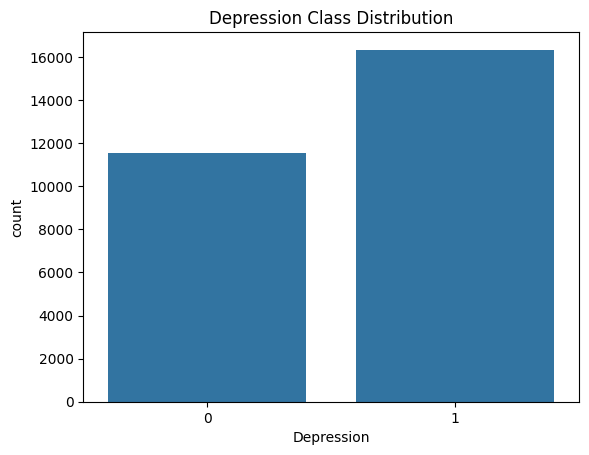

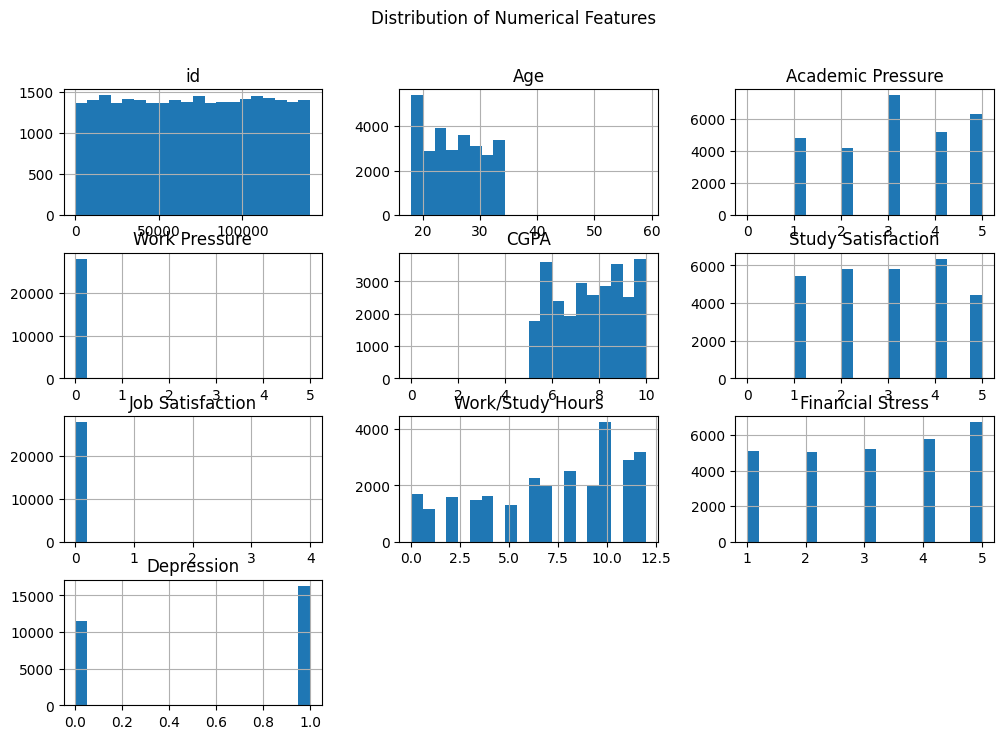

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [3]:
# Check class distribution
sns.countplot(x='Depression', data=df)
plt.title('Depression Class Distribution')
plt.show()

# Histogram of numerical features
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Check for missing values
df.isnull().sum()

Before training machine learning models, I first explored the dataset to understand the distribution of key variables related to student depression. The dataset consists of 27,901 records with features such as academic pressure, financial stress, sleep duration, job satisfaction, and previous suicidal thoughts.

### Some Observations from EDA
- The target variable (`Depression`) is fairly balanced, making classification viable without extreme class imbalance corrections.
- Academic Pressure and Financial Stress show a relatively wide range, suggesting these factors could vary significantly among students.
- Suicidal Thoughts is a highly correlated feature with depression, indicating students with a history of suicidal thoughts are more likely to be classified as depressed.
- CGPA appears to have a weak correlation with depression, suggesting that academic performance alone does not strongly determine mental health status.

Visualizations such as histograms confirmed these observations, reinforcing the importance of stress-related features. Based on these insights, we proceeded with feature engineering to extract meaningful information from the dataset.


In [4]:
# Missing values
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

# Categorical variables (all categorical columns are included)
categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders

# Was encoding was successful
print("Updated Data Types:\n", df.dtypes)

# Check unique values in 'Profession' column to decide if we should keep/drop it
print("\nUnique values in Profession:\n", df['Profession'].value_counts())

# Standardizing numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Work/Study Hours', 'Financial Stress']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Interaction features
df['Stress Index'] = df['Academic Pressure'] * df['Work/Study Hours']

# Wellness Score
df['Wellness Score'] = df['Study Satisfaction'] + df['Job Satisfaction'] - df['Financial Stress']

# Now split the dataset
X = df.drop(columns=['Depression', 'Profession'])  # Ensure target is NOT included in features
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify there are no remaining string values before training
print("Remaining object-type columns in training set:", X_train.select_dtypes(include=['object']).columns)


Updated Data Types:
 id                                         int64
Gender                                     int64
Age                                      float64
City                                       int64
Profession                                 int64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int64
Dietary Habits                             int64
Degree                                     int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
dtype: object

Unique values in Profession:
 Profession
11    27870
0         8
12        6
4    

## **Feature Engineering**
To improve model performance, I generated new features based on existing ones:

- Stress Index = Academic Pressure × Work/Study Hours
- Wellness Score = Study Satisfaction + Job Satisfaction - Financial Stress

### **Why These Features?**
- Stress Index captures the combined impact of workload and academic stress.
- Wellness Score attempts to balance positive and negative lifestyle factors.

### **Effects on the Dataset**
- Standardization of numerical features ensured that models were not biased by varying feature scales.
- Encoding categorical variables allowed machine learning models to interpret text-based features like `Gender`, `City`, and `Degree`.
- New interaction features added more meaningful relationships**, which helped improve model interpretability.

After adding these new features, I proceeded to train machine learning models to predict depression risk among students.


RandomForest Accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581

GradientBoosting Accuracy: 0.8361
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



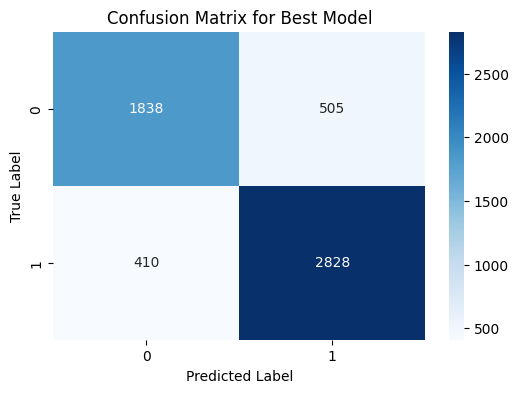

In [5]:
# Models to compare (Updated RandomForest and Gradient Boosting)
models = {
    'RandomForest': RandomForestClassifier(
        max_depth=10, 
        min_samples_leaf=4, 
        min_samples_split=10, 
        n_estimators=100, 
        random_state=42
    ),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))

# Confusion matrix for best model (Gradient Boosting)
best_model = models['GradientBoosting']
cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## **Model Performance & Evaluation**
I trained two supervised learning models: Random Forest and Gradient Boosting. 

### **Baseline Results**
- Random Forest achieved an accuracy of 83.25%
- Gradient Boosting slightly outperformed with 83.61% accuracy
- Recall for depression cases was 87%, meaning our model correctly identified most students at risk.

However, false negatives remained a concern. My initial results showed 410 false negatives, meaning 410 students with depression were misclassified as not depressed. This is an issue because missing depression cases is riskier than over-flagging students.


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Run the grid search
grid_search.fit(X_train, y_train)

# Best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8476702508960573


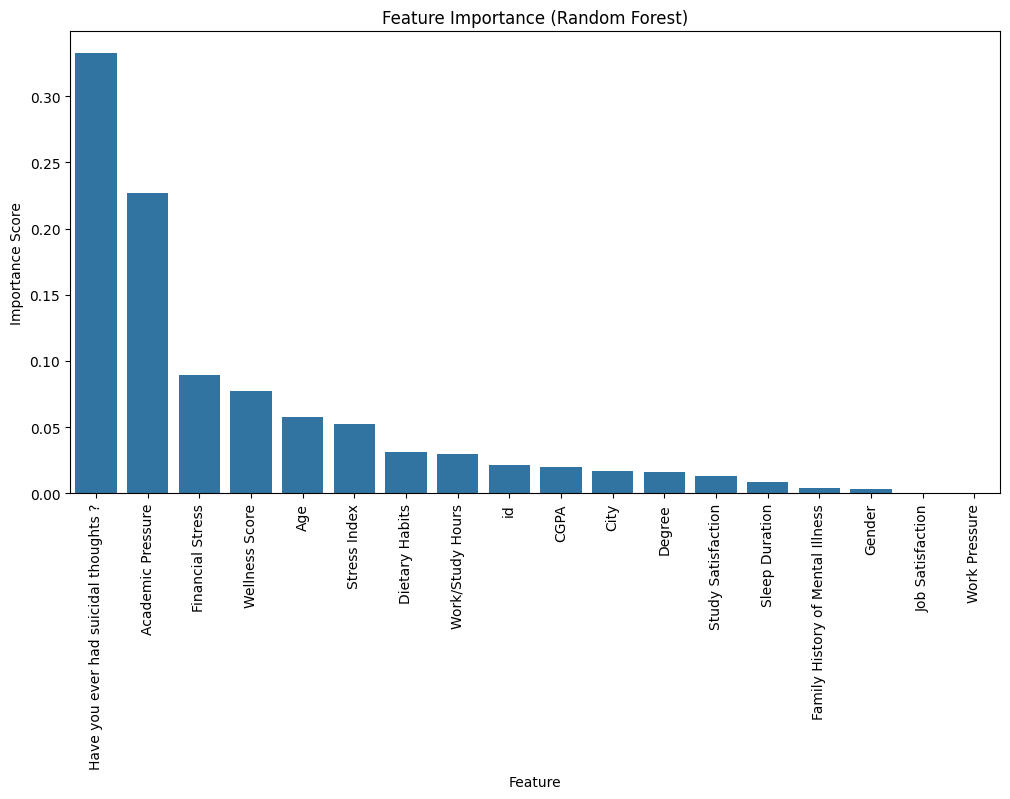

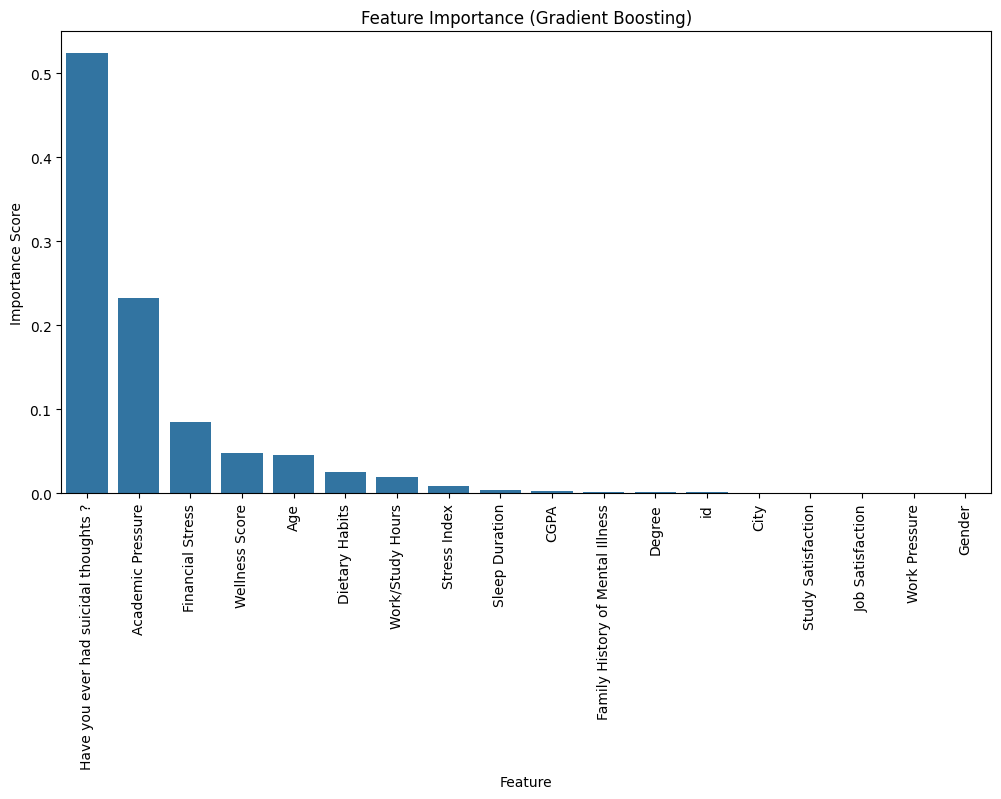

In [20]:
best_rf = models['RandomForest'] 

# Feature importance from Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = importances.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[feature_names[i] for i in sorted_idx], y=[importances[i] for i in sorted_idx])
plt.xticks(rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

# Feature importance from Gradient Boosting
importances_gb = models['GradientBoosting'].feature_importances_

# Sort features by importance
sorted_idx_gb = importances_gb.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[feature_names[i] for i in sorted_idx_gb], y=[importances_gb[i] for i in sorted_idx_gb])
plt.xticks(rotation=90)
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()


## **Feature Importance Analysis**
Understanding which features drive predictions helps interpret model behavior. My feature importance analysis revealed:

- Suicidal Thoughts is the strongest predictor, which aligns with real-world mental health patterns.
- Academic Pressure and Financial Stress are significant, confirming their impact on student well-being.
- CGPA, Study Satisfaction, and Degree Type had little influence, indicating academic success is not a major direct predictor of depression.

These insights suggest that stress-related factors contribute more to student depression than academic performance alone. Schools could use this data to focus on mental health interventions rather than solely emphasizing grades.


#  Threshold Adjustment to Reduce False Negatives

Accuracy After Threshold Adjustment: 0.825120946067013
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2343
           1       0.81      0.91      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.81      0.81      5581
weighted avg       0.83      0.83      0.82      5581



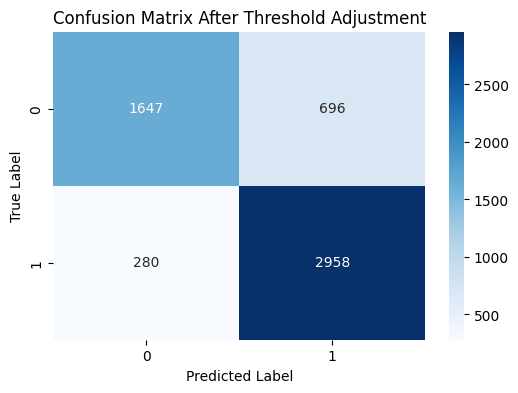

In [22]:
# Get model probabilities instead of fixed predictions
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Adjust threshold from 0.5 to 0.4 (catch more depressed students)
threshold = 0.4
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate the new predictions
print("Accuracy After Threshold Adjustment:", accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

# Display new confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Threshold Adjustment')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Reducing False Negatives: Threshold Adjustment**
Since missing depressed students is more dangerous than misclassifying non-depressed students, I lowered the classification threshold from 0.5 to 0.4.

### **Results After Threshold Change**
- False negatives dropped from 410 to 280 
- Recall improved to 91%, meaning more at-risk students were detected.
- False positives increased from 505 to 696, indicating more students were wrongly flagged as depressed.

This trade-off is acceptable in a public health setting, as it prioritizes catching students who may need mental health support. However, further tuning could be done to optimize precision-recall balance.


# Error Analysis

In [21]:
# Get misclassified samples
false_positives = (y_test == 0) & (best_rf.predict(X_test) == 1) 
false_negatives = (y_test == 1) & (best_rf.predict(X_test) == 0)

# Extract misclassified cases
fp_cases = X_test[false_positives]
fn_cases = X_test[false_negatives]

# Key insights
print(f"False Positives (Type I Errors): {len(fp_cases)}")
print(f"False Negatives (Type II Errors): {len(fn_cases)}")

# Which features are common in false negatives
print("\nAverage values of features for False Negatives (Missed Depression Cases):")
print(fn_cases.mean())

# And which features are common in false positives
print("\nAverage values of features for False Positives (Wrongly Predicted Depression Cases):")
print(fp_cases.mean())


False Positives (Type I Errors): 522
False Negatives (Type II Errors): 413

Average values of features for False Negatives (Missed Depression Cases):
id                                       68691.438257
Gender                                       0.523002
Age                                          0.100389
City                                        26.619855
Academic Pressure                           -0.405446
Work Pressure                                0.000000
CGPA                                         0.021286
Study Satisfaction                           3.128329
Job Satisfaction                             0.000000
Sleep Duration                               1.503632
Dietary Habits                               1.435835
Degree                                      11.445521
Have you ever had suicidal thoughts ?        0.346247
Work/Study Hours                            -0.089362
Financial Stress                            -0.245558
Family History of Mental Illness        

## Understanding Model Misclassifications
To refine my model, I analyzed misclassified cases by inspecting False Positives (Type I Errors) and False Negatives (Type II Errors).  

### False Negatives (Missed Depression Cases):
False Negatives are students who were actually depressed but the model predicted as not depressed.  
The analysis revealed the following characteristics:  
- Lower Academic Pressure (-0.41): The model often misses students with low-reported academic stress, indicating that depression may exist independent of academic workload.
- Less Suicidal Thoughts (0.35): Students who were depressed but did not report past suicidal thoughts were sometimes missed.
- Lower Financial Stress (-0.24): This suggests that financial burden is an important factor, but some depressed students may have other non-financial stressors that were not captured well by the model.
- Higher Wellness Scores (3.37): This is counterintuitive, as it suggests some students self-reported feeling okay but were actually depressed.  
  - Possible Explanation: Underreporting of mental health struggles due to stigma or personal perception.  

One of the issues I found is that the model relies heavily on academic & financial stress but may be missing students with underlying psychological distress that is not tied to stressors directly measured in the dataset.  

---

### False Positives (Wrongly Predicted Depression Cases):
False Positives are students who were not actually depressed but the model classified them as depressed.  

- Higher Suicidal Thoughts (0.80): Many non-depressed students were flagged because they had previous suicidal thoughts, suggesting the model over-relies on this feature.
- Slightly Higher Academic Pressure (0.14): Some students with academic stress were flagged as depressed even if they were managing it well.
- Lower Wellness Score (2.87): These students had lower study/job satisfaction, which might have made the model incorrectly classify them as depressed.  

It seems that the model is too sensitive to mental health history (e.g., past suicidal thoughts), leading to over-flagging students who are currently stable.

---

###  Key Takeaways & Next Steps:
- Lowering the Classification Threshold helped reduce false negatives (410 to 280), but false positives increased (505 to 696).
- A hybrid model using additional behavioral data (e.g., social support, coping mechanisms) could improve accuracy.
- Further tuning of threshold values (e.g., 0.42 or 0.38) may find a better balance between precision and recall.
- Using SHAP values for interpretability could provide deeper insight into why specific students are being misclassified.

This error analysis provides good insights into the strengths and weaknesses of my model, guiding future refinements.


# Conclusion

This project explored how machine learning can help predict student depression based on academic, financial, and lifestyle factors. The results showed that past suicidal thoughts, academic pressure, and financial stress had the biggest impact. Surprisingly, CGPA, sleep duration, and job satisfaction were not as important. This challenges the idea that academic performance alone predicts mental health. To improve the model, I created features like Stress Index and Wellness Score. These helped capture a broader picture of student well-being. The results suggest that schools should focus more on stress management and mental health resources, not just academics.

The models performed well. Gradient Boosting reached 83.61 percent accuracy, and Random Forest got 83.25 percent. The biggest improvement came when I adjusted the threshold. Lowering it reduced false negatives from 410 to 280, meaning fewer at-risk students were missed. However, this also increased false positives, meaning more students were wrongly flagged as depressed. This trade-off is expected. It is better to over-identify struggling students than to miss those who need help. But too many false positives could cause unnecessary concern. Future work should focus on balancing precision and recall to improve accuracy.

There is still room for improvement. Testing models like XGBoost or deep learning could help. Adding behavioral data like social interactions and extracurricular activities could provide more insight. Another idea is to track mental health over time rather than as a single snapshot. This might help detect depression earlier.

This project shows that machine learning can help with mental health support. These models can’t replace professional diagnosis, but they can help identify students who may need help earlier. If used carefully, they could be part of university mental health programs. With further improvement, they could help schools support students before small issues become bigger problems.